In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Basic Quantum Circuit (Bell State)

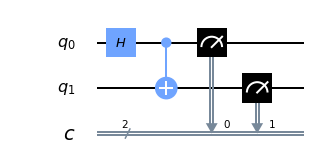

In [2]:
# Define a two qubit quantum circuit 
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')

circuit = QuantumCircuit(q,c)

# Apply the quantum gates
circuit.h(q[0])
circuit.cx(q[0],q[1])

# Do the measuring
circuit.measure(q,c)
circuit.draw(output="mpl")

# Simulation

In [3]:
# Simulation of circuit 
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit,backend=simulator, shots=1024)
result = job.result()

# Visualization

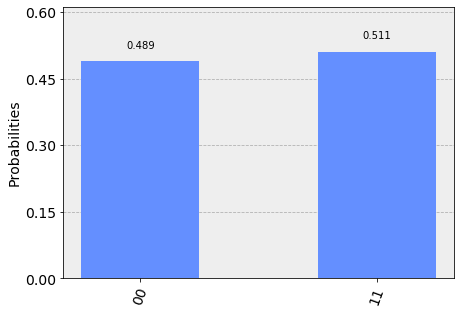

In [4]:
#Histogram plot of results
counts = result.get_counts(circuit)

plot_histogram(counts)

# Running on a real quantum device

Job Status: job has successfully run


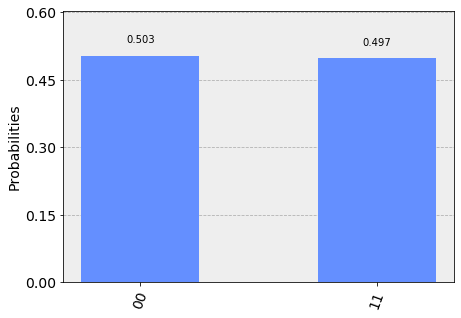

In [5]:
provider = IBMQ.get_provider()

lb_device = least_busy(provider.backends())

job = execute(circuit, backend=lb_device, shots=1024)
job_monitor(job)

result = job.result()

#Histogram plot of results
counts = result.get_counts(circuit)

plot_histogram(counts)